1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

scaled data: [[ 0.63880353  0.71434647  1.99195352]
 [-0.43618016 -0.79409572 -1.66645605]
 [-0.31344108  1.73712047  1.11023831]
 ...
 [-2.31596514 -2.86983097 -7.50176125]
 [ 1.36046761  4.26253355  6.98346877]
 [ 1.84683816  0.72981205  4.42348836]]
shape: (1000, 3)

Covariance matrix:
 [[ 0.97969206  0.84641657  2.80580069]
 [ 0.84641657 10.03608257 11.7289157 ]
 [ 2.80580069 11.7289157  17.34051707]] 


EIGENDECOMPOSITION OF THE COVARIANCE MATRIX:

Eigenvalues:
 [2.62746215e+01 1.32281247e-15 2.08167019e+00] 

Eigenvectors:
 [[-0.10868965 -0.81649658  0.56702724]
 [-0.58577405 -0.40824829 -0.70014434]
 [-0.80315336  0.40824829  0.43391015]] 

Eigenvalues sorted:
 [2.62746215e+01 2.08167019e+00 1.32281247e-15] 

Eigenvectors sorted:
 [[-0.10868965  0.56702724 -0.81649658]
 [-0.58577405 -0.70014434 -0.40824829]
 [-0.80315336  0.43391015  0.40824829]] 


SVD ON THE COVARIANCE MATRIX:

shapes: U = (3, 3) D: (3,) V^T: (3, 3) 

Spectrum:
 [2.62746215e+01 2.08167019e+00 1.57589887e-15] 


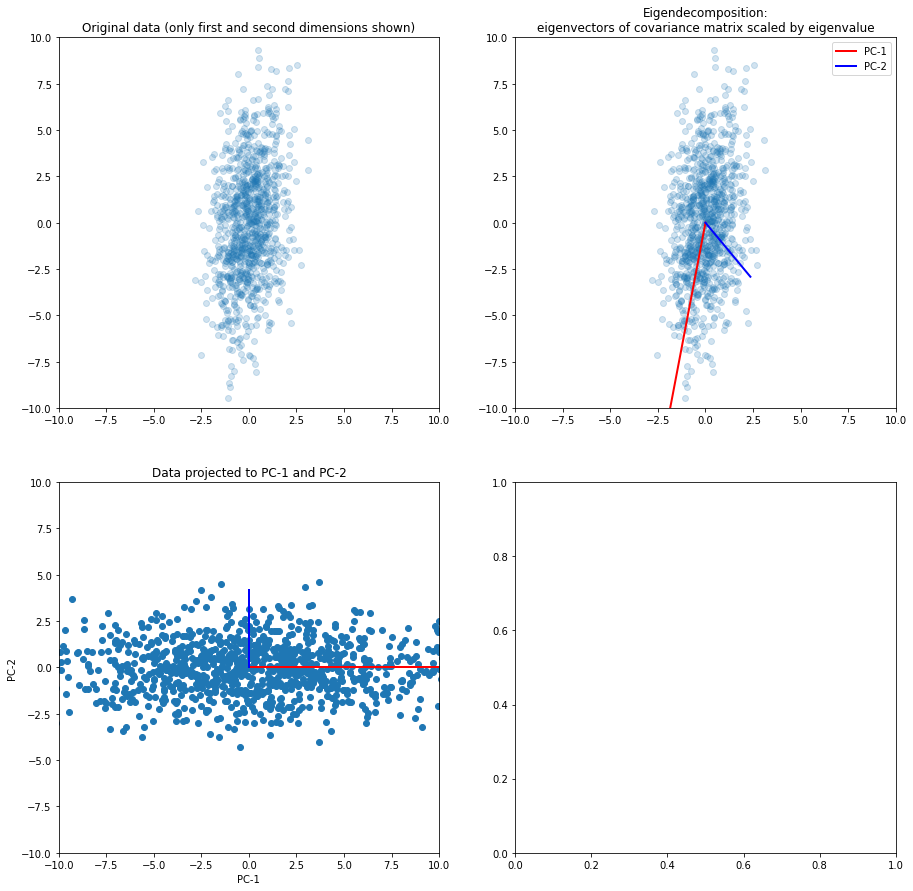

In [119]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

n = 1000
x1 = np.random.normal(loc=0,scale=1,size=n)
x2 = x1 + np.random.normal(loc=0,scale=3,size=n)
x3 = 2*x1 + x2

A = np.array([x1,x2,x3]).T #rows = number of observations (n), columns = number of features (3)
#A = np.array([x1,x2]).T #rows = number of observations (n), columns = number of features (3)

#let's scale the data subtracting its mean along the first axis (rows of each column)
#A = A - A.mean(axis = 0, keepdims = True)

print("scaled data:",A)
print("shape:",A.shape)

#setting up all plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,15))
axis_limits = [-10,10,-10,10]

#plotting original data
ax1.scatter(A[:,0], A[:,1], alpha=0.2)
ax1.set_title("Original data (only first and second dimensions shown)")
ax1.axis(axis_limits)

C = np.cov(A.T)
print("\nCovariance matrix:\n", C, '\n')

print("\nEIGENDECOMPOSITION OF THE COVARIANCE MATRIX:\n")

# now find the eigenvectors of the covariance matrix
l, V = la.eig(C)
# take only the real component, if possible
l = np.real_if_close(l)
Lambda = np.diag(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

decreasing_order = np.argsort(l)[::-1] #return the indeces that would sort the eigenvalues array
l = l[decreasing_order]
V = V[:, decreasing_order] #sort the eigenvectors according to the eigenvalues

print("Eigenvalues sorted:\n",l,"\n")
print("Eigenvectors sorted:\n",V,"\n")

#print("are eigenvectors orthogonal to each other?",(np.allclose(np.dot(V[:,0],V[:,1]),0),np.allclose(np.dot(V[:,1],V[:,2]),0),np.allclose(np.dot(V[:,0],V[:,2]),0)))
res = np.dot(V[:,0],V[:,1])
print("\nSVD ON THE COVARIANCE MATRIX:\n")

# perform the SVD
U, S, Vt = la.svd(C)

print("shapes: U =", U.shape, "D:", S.shape, "V^T:", Vt.shape, '\n')
print("Spectrum:\n", S, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

#let's calculate the explained variances for every principal component
explained_variances = []
for li in l:
    explained_variances.append(li/Lambda.trace())
print("Total variability retained for each principal component: ",explained_variances,"\n")


#defining the projection matrix W: k x m matrix where k = number of feature we want to handle (2), m = number of original features (3)
#the columns of W are the two eigenvectors with maximum eigenvalue: the so called first and second principal components
W = V[:,0:2]
print("Projection matrix W:\n",W,"\n")

#now we project original data using the first and second principal component
#the projected data is obtained by the linear transformation: WA where A is the nxm matrix with the original data
#projected_data will be a nxk matrix
projected_data = np.dot(A, W)
print("projected_data matrix shape:",projected_data.shape)


ax2.set_title('Eigendecomposition:\neigenvectors of covariance matrix scaled by eigenvalue')
# the original data distribution
ax2.scatter(A[:,0], A[:,1], alpha=0.2)
ax2.axis(axis_limits)

scale_factor = 2 # a scale factor to graphically enhance the lines - only for visualization purposes

# draw each eigenvectors rescaled by the eigenvalues
for li, vi, color, label in zip(l, W.T,['r-','b-'],['PC-1','PC-2']):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], color , lw=2, label=label)
ax2.legend()


ax3.scatter(projected_data[:,0],projected_data[:,1])
ax3.set_title("Data projected to PC-1 and PC-2")
ax3.axis(axis_limits)
ax3.set_xlabel("PC-1")
ax3.set_ylabel("PC-2")
for li, vi, color in zip(l, np.diag([1]*len(l)),['r-','b-']):
    ax3.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], color, lw=2)


2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [2]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 